In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from d2l import torch as d2l
from tqdm import tqdm

In [6]:
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=batch_size, resize=224)

In [7]:
def alexnet():
    return nn.Sequential(
        nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1), 
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2),
        nn.Conv2d(96, 256, kernel_size=5, padding=2), 
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2),
        nn.Conv2d(256, 384, kernel_size=3, padding=1), 
        nn.ReLU(),
        nn.Conv2d(384, 384, kernel_size=3, padding=1), 
        nn.ReLU(),
        nn.Conv2d(384, 256, kernel_size=3, padding=1), 
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2), 
        nn.Flatten(),
        nn.Linear(6400, 4096), 
        nn.ReLU(), 
        nn.Dropout(p=0.5),
        nn.Linear(4096, 4096), 
        nn.ReLU(), 
        nn.Dropout(p=0.5),
        nn.Linear(4096, 10)
    )

In [8]:
def evaluate_accuracy(net, data_iter):

    if isinstance(net, torch.nn.Module):
        net.eval()

    correct = 0
    examples = 0
    for X, y in data_iter:
        pred = torch.argmax(net(X), axis=1)
        correct += (pred == y).sum()
        examples += len(y)

    return correct / examples

In [9]:
def train(net, train_iter, test_iter, epochs, learning_rate):

    def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight)

    net.apply(init_weights)
    optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
    loss = nn.CrossEntropyLoss()
    
    train, test = [], []
    
    for epoch in range(epochs):
        total_train_loss, total_test_loss = 0, 0
        
        for X, y in tqdm(train_iter, f'Epoch: {epoch + 1}'):
            optimizer.zero_grad()
            l = loss(net(X), y)
            total_train_loss += l
            l.backward()
            optimizer.step()
            train.append(l)
    
        for X, y in test_iter:
            l = loss(net(X), y)
            total_test_loss += l
            test.append(l)
                
        print(f'Train accuracy/loss: {evaluate_accuracy(net, train_iter)} / {total_train_loss}\nTest accuracy/loss: {evaluate_accuracy(net, test_iter)} / {total_test_loss}')
        
    return train, test

In [11]:
train_h, test_h = train(alexnet(), train_iter, test_iter, 10, 0.01)

Epoch: 1:   1%|          | 5/469 [00:21<33:12,  4.29s/it]


KeyboardInterrupt: 

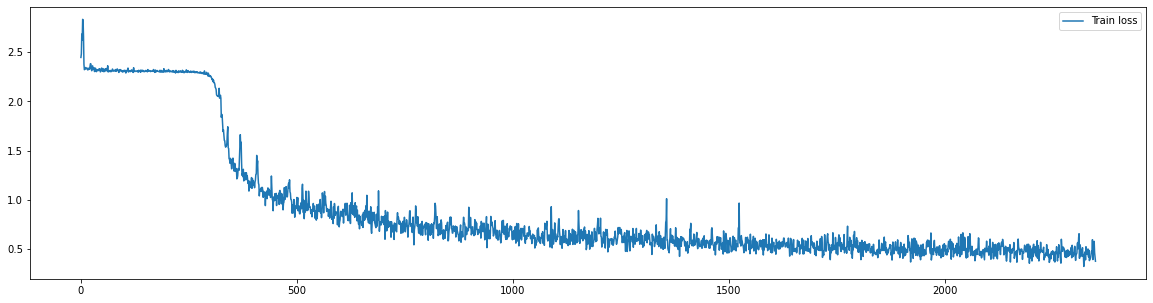

In [18]:
plt.figure(figsize=(20,5))
plt.plot(np.array([x.detach().numpy() for x in train_h]), label='Train loss')
plt.legend()
plt.show()